# Question 1: Field lines of uniform motion of a charge

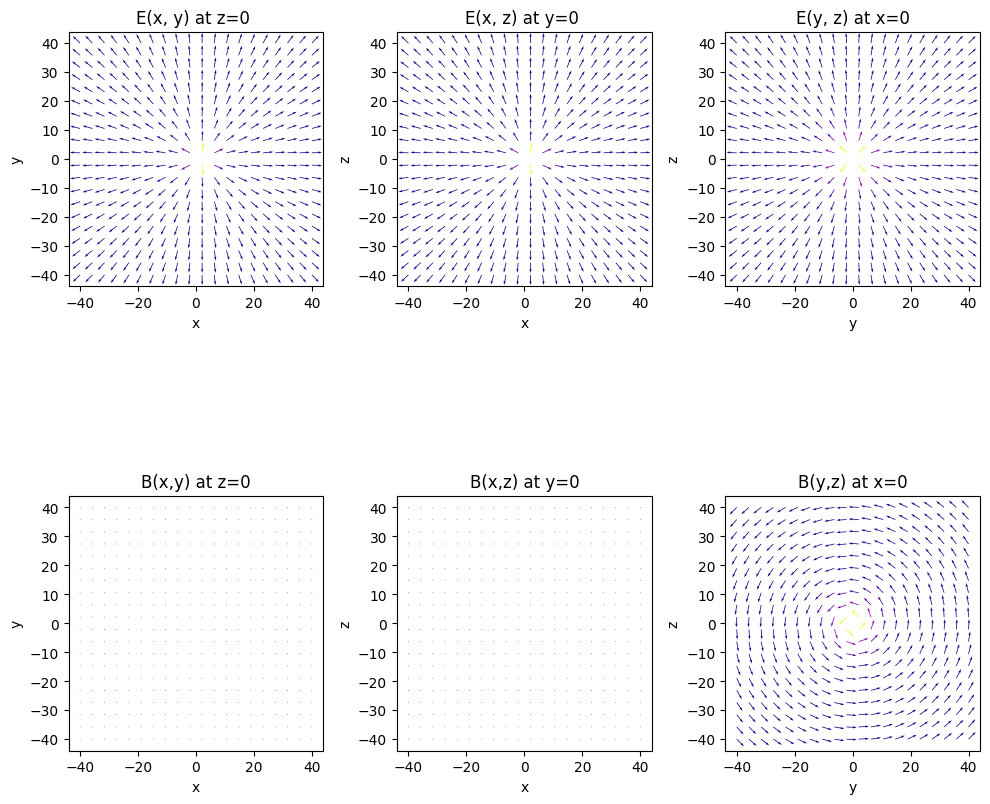

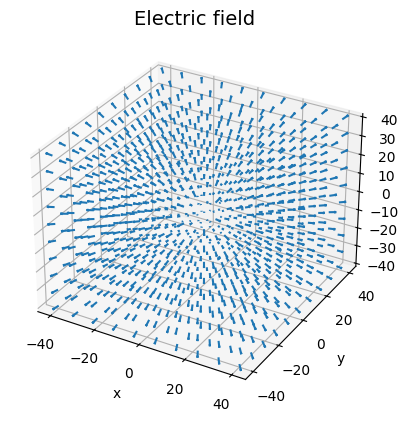

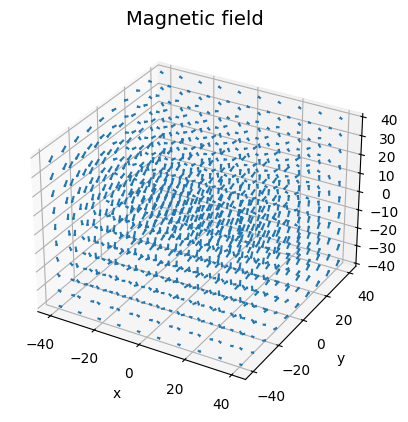

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = 6
c = 1.0
beta = 0.3
q = 1.0
gamma = 1.0 / np.sqrt(1.0 - beta**2)
'''
x1 = np.linspace(0.1, 10, 10)
y1 = np.linspace(0.1, 10, 10)
z1 = np.linspace(0.1, 10, 10)


rprime1 = np.sqrt((gamma*(x1 - beta*t))**2 + y1**2 + z1**2)

E = np.zeros((x1.size, 3))
B = np.zeros((x1.size, 3))

E[:, 0] = q * gamma * (x1 - beta * c * t) / (rprime1**3)
E[:, 1] = q * gamma * y1 / (rprime1**3)
E[:, 2] = q * gamma * z1 / (rprime1**3)

B[:, 0] = 0
B[:, 1] = -q * gamma * beta * z1 / (rprime1**3)
B[:, 2] = q * gamma * beta * y1 / (rprime1**3)
'''
#for i in range(10):
 #   print("E=", E[i], "B=", B[i])


# ====  (plotting the field lines) ==== we used rybiki lightman formula for electric magnetic field component

nx = 20
ny = 20
nz = 20
x = np.linspace(-40, 40, nx)
y = np.linspace(-40, 40, ny)
z = np.linspace(-40, 40, nz)
X1, Y1 = np.meshgrid(x, y)
X2, Z1 = np.meshgrid(x, z)
Y2, Z2 = np.meshgrid(y, z)

#we assume z=0 
robser2 = np.sqrt((gamma*(X1 - beta*c*t))**2 + Y1**2) 
Ex1 = q * gamma * (X1 - beta*c*t) / (robser2**3)
Ey1 = q * gamma * Y1 / (robser2**3)
Ez1 = np.zeros_like(Ex1)
Bx1 = np.zeros_like(Ex1)
By1 = np.zeros_like(Ex1)
Bz1 = q * gamma * beta * Y1 / (robser2**3)

#we assume y=0
robser3 = np.sqrt((gamma*(X2 - beta*c*t))**2 + Z1**2) 
Ex2 = q * gamma * (X2 - beta*c*t) / (robser3**3)
Ey2 = np.zeros_like(Ex2)
Ez2 = q * gamma * Z1 / (robser3**3)
Bx2 = np.zeros_like(Ex2)
By2 = -q * gamma * beta * Z1 / (robser3**3)
Bz2 = np.zeros_like(Ex2)

#we assume x=0
robser4 = np.sqrt((gamma*(0 - beta*c*t))**2 + Y2**2 + Z2**2)
Ex3 = q * gamma * (0 - beta*c*t) / (robser4**3)
Ey3 = q * gamma * Y2 / (robser4**3)
Ez3 = q * gamma * Z2 / (robser4**3)
Bx3 = np.zeros_like(Ex3)
By3 = -q * gamma * beta * Z2 / (robser4**3)
Bz3 = q * gamma * beta * Y2 / (robser4**3)


mag_E1 = np.hypot(Ex1, Ey1)
Exn1, Eyn1 = Ex1 / mag_E1, Ey1 / mag_E1

mag_E2 = np.hypot(Ex2, Ez2)
Exn2, Ezn2 = Ex2 / mag_E2, Ez2 / mag_E2

mag_E3 = np.hypot(Ey3, Ez3)
Eyn3, Ezn3 = Ey3 / mag_E3, Ez3 / mag_E3

mag_B1 = np.hypot(Bx1, By1)
mag_B1[mag_B1 == 0] = 1.0
Bxn1, Byn1 = Bx1 / mag_B1, By1 / mag_B1

mag_B2 = np.hypot(Bx2, Bz2)
mag_B2[mag_B2 == 0] = 1.0
Bxn2, Bzn2 = Bx2 / mag_B2, Bz2 / mag_B2

mag_B3 = np.hypot(By3, Bz3)
Byn3, Bzn3 = By3 / mag_B3, Bz3 / mag_B3


# === Plotting ===
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

ax[0, 0].quiver(X1, Y1, Exn1, Eyn1, mag_E1, cmap='plasma', scale=25)
ax[0, 0].set_title("E(x, y) at z=0 ")
ax[0, 0].set_xlabel("x")
ax[0, 0].set_ylabel("y")
ax[0, 0].set_aspect('equal')

ax[0, 1].quiver(X2, Z1, Exn2, Ezn2, mag_E2, cmap='plasma', scale=25)
ax[0, 1].set_title("E(x, z) at y=0 ")
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("z")
ax[0, 1].set_aspect('equal')

ax[0, 2].quiver(Y2, Z2, Eyn3, Ezn3, mag_E3, cmap='plasma', scale=25)
ax[0, 2].set_title("E(y, z) at x=0")
ax[0, 2].set_xlabel("y")
ax[0, 2].set_ylabel("z")
ax[0, 2].set_aspect('equal')

ax[1, 0].quiver(X1, Y1, Bxn1, Byn1, mag_B1, cmap='plasma', scale=25)
ax[1, 0].set_title("B(x,y) at z=0")
ax[1, 0].set_xlabel("x")
ax[1, 0].set_ylabel("y")
ax[1, 0].set_aspect('equal')

ax[1, 1].quiver(X2, Z1, Bxn2, Bzn2, mag_B2, cmap='plasma', scale=25)
ax[1, 1].set_title("B(x,z) at y=0")
ax[1, 1].set_xlabel("x")
ax[1, 1].set_ylabel("z")
ax[1, 1].set_aspect('equal')

ax[1, 2].quiver(Y2, Z2, Byn3, Bzn3, mag_B3, cmap='plasma', scale=25)
ax[1, 2].set_title("B(y,z) at x=0")
ax[1, 2].set_xlabel("y")
ax[1, 2].set_ylabel("z")
ax[1, 2].set_aspect('equal')

plt.tight_layout()
plt.show()


# === 3D plotting ===
Xd, Yd, Zd = np.meshgrid(np.linspace(-40, 40, 10),
                         np.linspace(-40, 40, 10),
                         np.linspace(-40, 40, 10))

robserver = np.sqrt((gamma*(Xd - beta*c*t))**2 + Yd**2 + Zd**2)

Exd = q * gamma * (Xd - beta*c*t) / (robserver**3)
Eyd = q * gamma * Yd / (robserver**3)
Ezd = q * gamma * Zd / (robserver**3)

Bxd = np.zeros_like(Exd)
Byd = -q * gamma * beta * Zd / (robserver**3)
Bzd = q * gamma * beta * Yd / (robserver**3)

ax = plt.figure().add_subplot(projection='3d')
ax.quiver(Xd, Yd, Zd, Exd, Eyd, Ezd, length=3, normalize=True)
ax.set_title("Electric field", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

ax = plt.figure().add_subplot(projection='3d')
ax.quiver(Xd, Yd, Zd, Bxd, Byd, Bzd, length=3, normalize=True)
ax.set_title("Magnetic field", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


# Question 2 field lines of uniformly accelarated charged particle when acceleration perpendicular to the velocity 

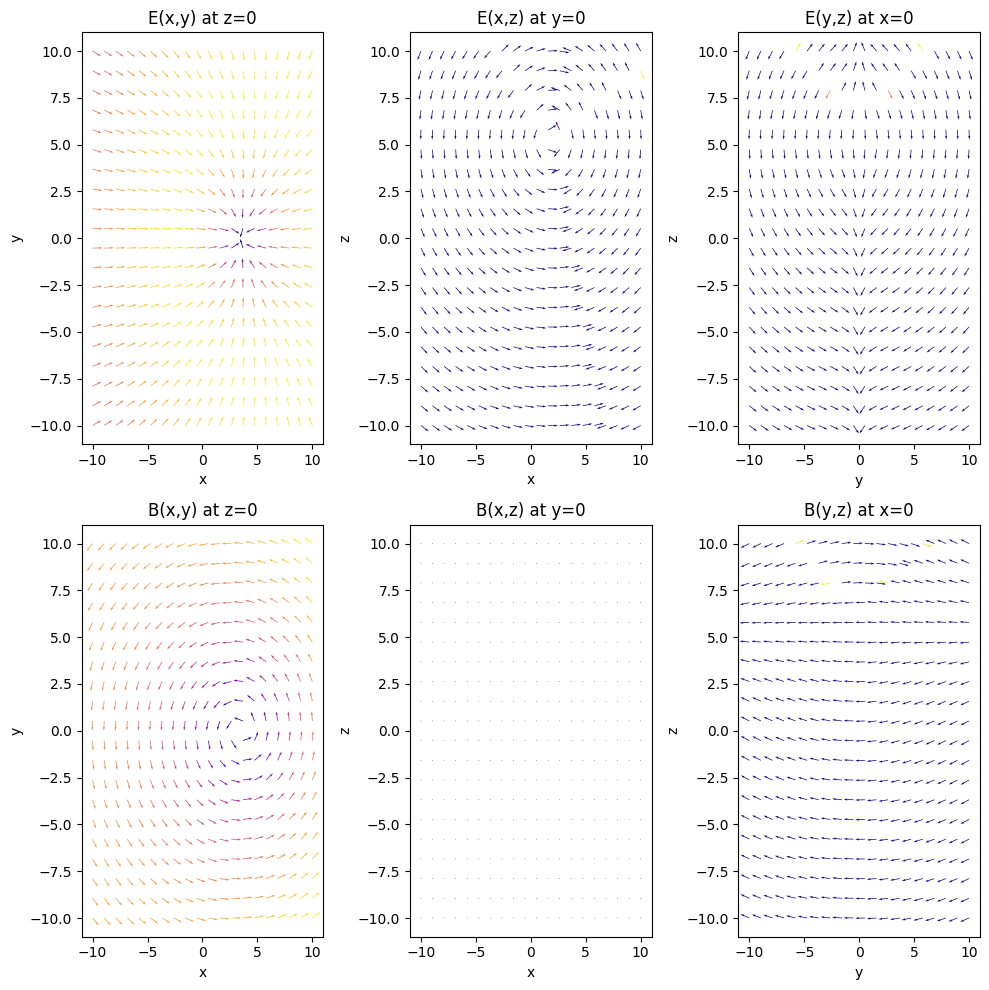

<Figure size 1000x1000 with 0 Axes>

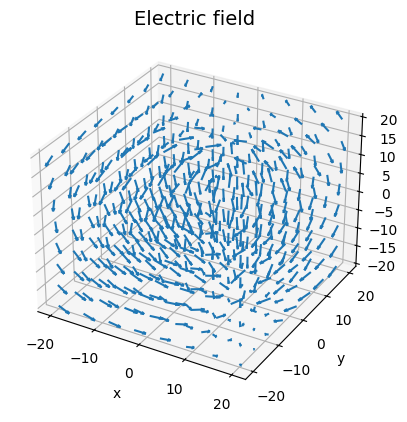

<Figure size 1000x1000 with 0 Axes>

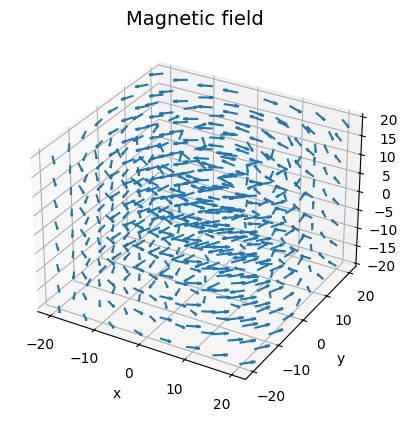

In [4]:
#question no 2
import numpy as np
import matplotlib.pyplot as plt

q = 1.0
c = 1.0
t_ret=6
beta=0.3
a0=0.3

def r_p(t):
    return np.array([beta*c*t,0,0.5*a0*t**2])

def v_p(t):
    return np.array([beta*c+0*t,0,a0*t])

def a_p(t):
    return np.array([0,0.0,a0])

def E_func(r_o):
    rp=r_p(t_ret);vp=v_p(t_ret);ap=a_p(t_ret)
    Rv=r_o-rp
    R=np.linalg.norm(Rv)
    n=Rv/R
    mpt=vp/c
    npe=ap/c
    kap=1.0-np.dot(n,mpt)
    numer=np.cross(n,np.cross(n-mpt,npe))
    E_rad=numer/((kap**3)*R)
    return E_rad

def B_func(r_o):
    E=E_func(r_o)
    rp=r_p(t_ret)
    Rv=r_o-rp
    n=Rv/(np.linalg.norm(Rv))
    B_rad=np.cross(n,E)
    return B_rad

nx=ny=nz=20
x=np.linspace(-10,10,20)
y=np.linspace(-10,10,20)
z=np.linspace(-10,10,20)
X,Y=np.meshgrid(x,y)

Ex1=np.zeros_like(X)
Ey1=np.zeros_like(X)
Ez1=np.zeros_like(X)
Bx1=np.zeros_like(X)
By1=np.zeros_like(X)
Bz1=np.zeros_like(X)
Ex2=np.zeros_like(X)
Ey2=np.zeros_like(X)
Ez2=np.zeros_like(X)
Bx2=np.zeros_like(X)
By2=np.zeros_like(X)
Bz2=np.zeros_like(X)

for j in range(ny):
    for i in range(nx):
        r_o=np.array([X[j,i],Y[j,i],0])
        E1=E_func(r_o)
        Ex1[j,i],Ey1[j,i]=E1[0],E1[1]
        
        r_o=np.array([X[j,i],0,Y[j,i]])
        E2=E_func(r_o)
        Ex2[j,i],Ez1[j,i]=E2[0],E2[2]
        
        r_o=np.array([0,X[j,i],Y[j,i]])
        E3=E_func(r_o)
        Ey2[j,i],Ez2[j,i]=E3[1],E3[2]
        
        r_o=np.array([X[j,i],Y[j,i],0])
        B1=B_func(r_o)
        Bx1[j,i],By1[j,i]=B1[0],B1[1]
        
        r_o=np.array([X[j,i],0,Y[j,i]])
        B2=B_func(r_o)
        Bx2[j,i],Bz1[j,i]=B2[0],B2[2]
        
        r_o=np.array([0,X[j,i],Y[j,i]])
        B3=B_func(r_o)
        By2[j,i],Bz2[j,i]=B3[1],B3[2]


fig,ax=plt.subplots(2,3,figsize=(10,10))
mag1=np.hypot(Ex1,Ey1)
mag1[mag1==0.0]=1.0
ax[0,0].quiver(X,Y,Ex1/mag1,Ey1/mag1,mag1,cmap='plasma',scale=25)
ax[0,0].set_title("E(x,y) at z=0")
ax[0,0].set_xlabel("x") 
ax[0,0].set_ylabel("y")
mag2=np.hypot(Ex2,Ez1)
mag2[mag2==0.0]=1.0
ax[0,1].quiver(X,Y,Ex2/mag2,Ez1/mag2,mag2,cmap='plasma',scale=25)
ax[0,1].set_title("E(x,z) at y=0")
ax[0,1].set_xlabel("x") 
ax[0,1].set_ylabel("z")
mag3=np.hypot(Ey2,Ez2)
mag3[mag3==0.0]=1.0
ax[0,2].quiver(X,Y,Ey2/mag3,Ez2/mag3,mag3,cmap='plasma',scale=25)
ax[0,2].set_title("E(y,z) at x=0")
ax[0,2].set_xlabel("y") 
ax[0,2].set_ylabel("z")
mag4=np.hypot(Bx1,By1)
mag4[mag4==0.0]=1.0
ax[1,0].quiver(X,Y,Bx1/mag4,By1/mag4,mag4,cmap='plasma',scale=25)
ax[1,0].set_title("B(x,y) at z=0")
ax[1,0].set_xlabel("x") 
ax[1,0].set_ylabel("y")
mag5=np.hypot(Bx2,Bz1)
mag5[mag5==0.0]=1.0
ax[1,1].quiver(X,Y,Bx2/mag5,Bz1/mag5,mag5,cmap='plasma',scale=25)
ax[1,1].set_title("B(x,z) at y=0")
ax[1,1].set_xlabel("x") 
ax[1,1].set_ylabel("z")
mag6=np.hypot(By2,Bz2)
mag6[mag6==0.0]=1.0
ax[1,2].quiver(X,Y,By2/mag6,Bz2/mag6,mag6,cmap='plasma',scale=25)
ax[1,2].set_title("B(y,z) at x=0")
ax[1,2].set_xlabel("y") 
ax[1,2].set_ylabel("z")
plt.tight_layout()
plt.show()

#For the 3d plotting
Xd,Yd,Zd=np.meshgrid(np.linspace(-20,20,8),np.linspace(-20,20,8),np.linspace(-20,20,8))
Exd=np.zeros_like(Xd)
Eyd=np.zeros_like(Yd)
Ezd=np.zeros_like(Zd)
Bxd=np.zeros_like(Xd)
Byd=np.zeros_like(Yd)
Bzd=np.zeros_like(Zd)
for j in range(8):
    for i in range(8):
      for k in range (8):
        r_o=np.array([Xd[j,i,k],Yd[j,i,k],Zd[j,i,k]])
        Ed=E_func(r_o)
        Exd[j,i,k],Eyd[j,i,k],Ezd[j,i,k]=Ed[0],Ed[1],Ed[2]
        Bd=B_func(r_o)
        Bxd[j,i,k],Byd[j,i,k],Bzd[j,i,k]=Bd[0],Bd[1],Bd[2]

fig=plt.figure(figsize=(10,10))
ax=plt.figure().add_subplot(projection='3d')
ax.quiver(Xd,Yd,Zd,Exd,Eyd,Ezd,length=3,normalize=True)
ax.set_title("Electric field",fontsize=14)
ax.set_xlabel("x"); ax.set_ylabel("y");ax.set_zlabel("z")
plt.show()
fig=plt.figure(figsize=(10,10))
ax=plt.figure().add_subplot(projection='3d')
ax.quiver(Xd,Yd,Zd,Bxd,Byd,Bzd,length=3,normalize=True)
ax.set_title("Magnetic field",fontsize=14)
ax.set_xlabel("x"); ax.set_ylabel("y");ax.set_zlabel("z")
plt.show()

# Question 2 field lines when accelaration parallel to velocity

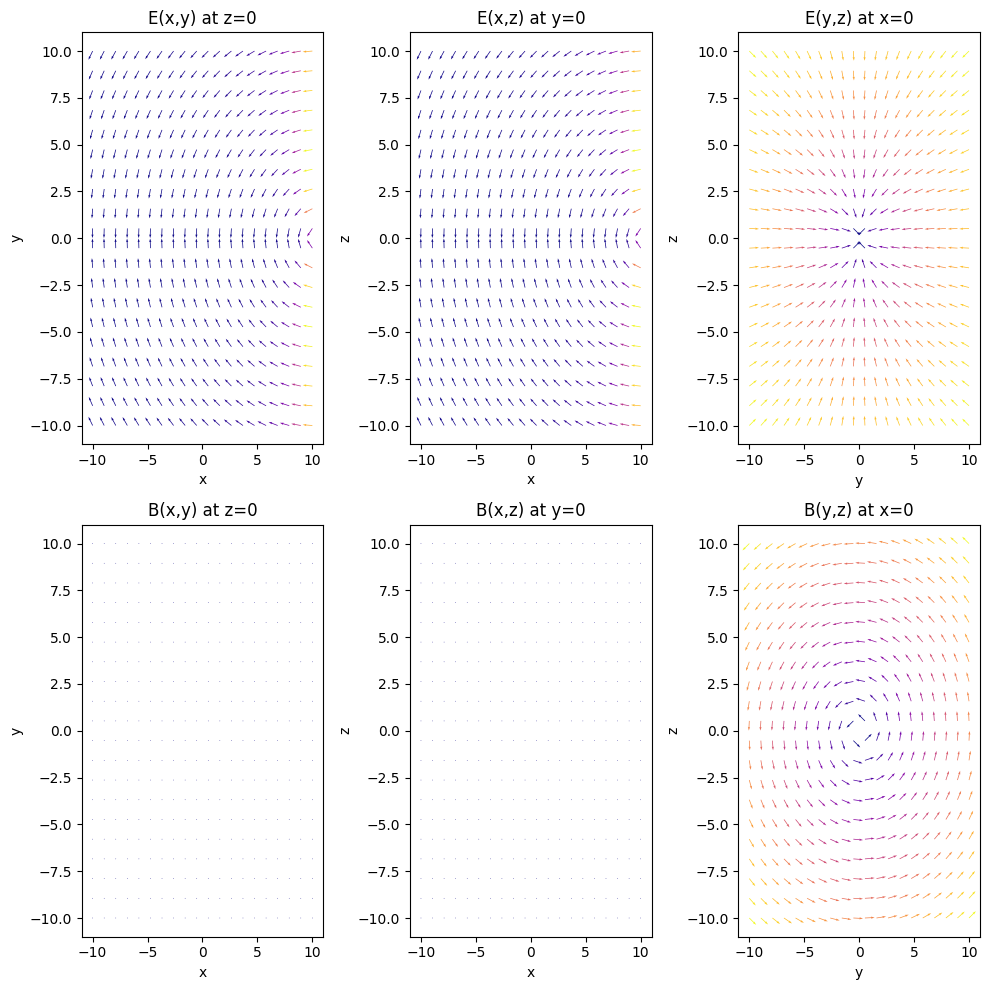

<Figure size 1000x1000 with 0 Axes>

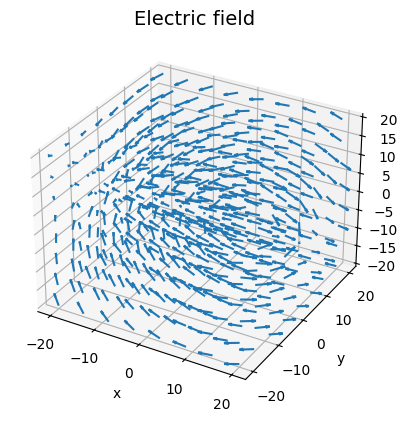

<Figure size 1000x1000 with 0 Axes>

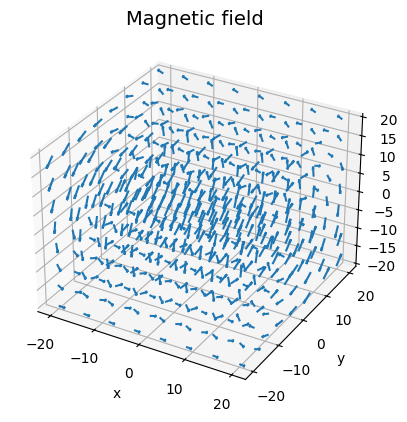

In [5]:
#question no 2 accleration parallel to the velocity
import numpy as np
import matplotlib.pyplot as plt

q = 1.0
c = 1.0
t_ret=6
beta=0.9
a0=0.3

def r_p(t):
    return np.array([beta*c*t+0.5*a0*t**2,0,0])

def v_p(t):
    return np.array([beta*c+a0*t,0,0])

def a_p(t):
    return np.array([a0,0.0,0])

def E_func(r_o):
    rp=r_p(t_ret);vp=v_p(t_ret);ap=a_p(t_ret)
    Rv=r_o-rp
    R=np.linalg.norm(Rv)
    n=Rv/R
    mpt=vp/c
    npe=ap/c
    kap=1.0-np.dot(n,mpt)
    numer=np.cross(n,np.cross(n-mpt,npe))
    E_rad=numer/((kap**3)*R)
    return E_rad

def B_func(r_o):
    E=E_func(r_o)
    rp=r_p(t_ret)
    Rv=r_o-rp
    n=Rv/(np.linalg.norm(Rv))
    B_rad=np.cross(n,E)
    return B_rad

nx=ny=nz=20
x=np.linspace(-10,10,20)
y=np.linspace(-10,10,20)
z=np.linspace(-10,10,20)
X,Y=np.meshgrid(x,y)

Ex1=np.zeros_like(X)
Ey1=np.zeros_like(X)
Ez1=np.zeros_like(X)
Bx1=np.zeros_like(X)
By1=np.zeros_like(X)
Bz1=np.zeros_like(X)
Ex2=np.zeros_like(X)
Ey2=np.zeros_like(X)
Ez2=np.zeros_like(X)
Bx2=np.zeros_like(X)
By2=np.zeros_like(X)
Bz2=np.zeros_like(X)

for j in range(ny):
    for i in range(nx):
        r_o=np.array([X[j,i],Y[j,i],0])
        E1=E_func(r_o)
        Ex1[j,i],Ey1[j,i]=E1[0],E1[1]
        r_o=np.array([X[j,i],0,Y[j,i]])
        E2=E_func(r_o)
        Ex2[j,i],Ez1[j,i]=E2[0],E2[2]
        r_o=np.array([0,X[j,i],Y[j,i]])
        E3=E_func(r_o)
        Ey2[j,i],Ez2[j,i]=E3[1],E3[2]
        r_o=np.array([X[j,i],Y[j,i],0])
        B1=B_func(r_o)
        Bx1[j,i],By1[j,i]=B1[0],B1[1]
        r_o=np.array([X[j,i],0,Y[j,i]])
        B2=B_func(r_o)
        Bx2[j,i],Bz1[j,i]=B2[0],B2[2]
        r_o=np.array([0,X[j,i],Y[j,i]])
        B3=B_func(r_o)
        By2[j,i],Bz2[j,i]=B3[1],B3[2]


fig,ax=plt.subplots(2,3,figsize=(10,10))
mag1=np.hypot(Ex1,Ey1)
mag1[mag1==0.0]=1.0
ax[0,0].quiver(X,Y,Ex1/mag1,Ey1/mag1,mag1,cmap='plasma',scale=25)
ax[0,0].set_title("E(x,y) at z=0")
ax[0,0].set_xlabel("x") 
ax[0,0].set_ylabel("y")
mag2=np.hypot(Ex2,Ez1)
mag2[mag2==0.0]=1.0
ax[0,1].quiver(X,Y,Ex2/mag2,Ez1/mag2,mag2,cmap='plasma',scale=25)
ax[0,1].set_title("E(x,z) at y=0")
ax[0,1].set_xlabel("x") 
ax[0,1].set_ylabel("z")
mag3=np.hypot(Ey2,Ez2)
mag3[mag3==0.0]=1.0
ax[0,2].quiver(X,Y,Ey2/mag3,Ez2/mag3,mag3,cmap='plasma',scale=25)
ax[0,2].set_title("E(y,z) at x=0")
ax[0,2].set_xlabel("y") 
ax[0,2].set_ylabel("z")
mag4=np.hypot(Bx1,By1)
mag4[mag4==0.0]=1.0
ax[1,0].quiver(X,Y,Bx1/mag4,By1/mag4,mag4,cmap='plasma',scale=25)
ax[1,0].set_title("B(x,y) at z=0")
ax[1,0].set_xlabel("x") 
ax[1,0].set_ylabel("y")
mag5=np.hypot(Bx2,Bz1)
mag5[mag5==0.0]=1.0
ax[1,1].quiver(X,Y,Bx2/mag5,Bz1/mag5,mag5,cmap='plasma',scale=25)
ax[1,1].set_title("B(x,z) at y=0")
ax[1,1].set_xlabel("x") 
ax[1,1].set_ylabel("z")
mag6=np.hypot(By2,Bz2)
mag6[mag6==0.0]=1.0
ax[1,2].quiver(X,Y,By2/mag6,Bz2/mag6,mag6,cmap='plasma',scale=25)
ax[1,2].set_title("B(y,z) at x=0")
ax[1,2].set_xlabel("y") 
ax[1,2].set_ylabel("z")
plt.tight_layout()
plt.show()

#For the 3d plotting
Xd,Yd,Zd=np.meshgrid(np.linspace(-20,20,8),np.linspace(-20,20,8),np.linspace(-20,20,8))
Exd=np.zeros_like(Xd)
Eyd=np.zeros_like(Yd)
Ezd=np.zeros_like(Zd)
Bxd=np.zeros_like(Xd)
Byd=np.zeros_like(Yd)
Bzd=np.zeros_like(Zd)
for j in range(8):
    for i in range(8):
      for k in range (8):
        r_o=np.array([Xd[j,i,k],Yd[j,i,k],Zd[j,i,k]])
        Ed=E_func(r_o)
        Exd[j,i,k],Eyd[j,i,k],Ezd[j,i,k]=Ed[0],Ed[1],Ed[2]
        Bd=B_func(r_o)
        Bxd[j,i,k],Byd[j,i,k],Bzd[j,i,k]=Bd[0],Bd[1],Bd[2]

fig=plt.figure(figsize=(10,10))
ax=plt.figure().add_subplot(projection='3d')
ax.quiver(Xd,Yd,Zd,Exd,Eyd,Ezd,length=3,normalize=True)
ax.set_title("Electric field",fontsize=14)
ax.set_xlabel("x"); ax.set_ylabel("y");ax.set_zlabel("z")
plt.show()
fig=plt.figure(figsize=(10,10))
ax=plt.figure().add_subplot(projection='3d')
ax.quiver(Xd,Yd,Zd,Bxd,Byd,Bzd,length=3,normalize=True)
ax.set_title("Magnetic field",fontsize=14)
ax.set_xlabel("x"); ax.set_ylabel("y");ax.set_zlabel("z")
plt.show()

# Question 3 Angular distution 3d for accleration perpendicular and  parallel to velocity 

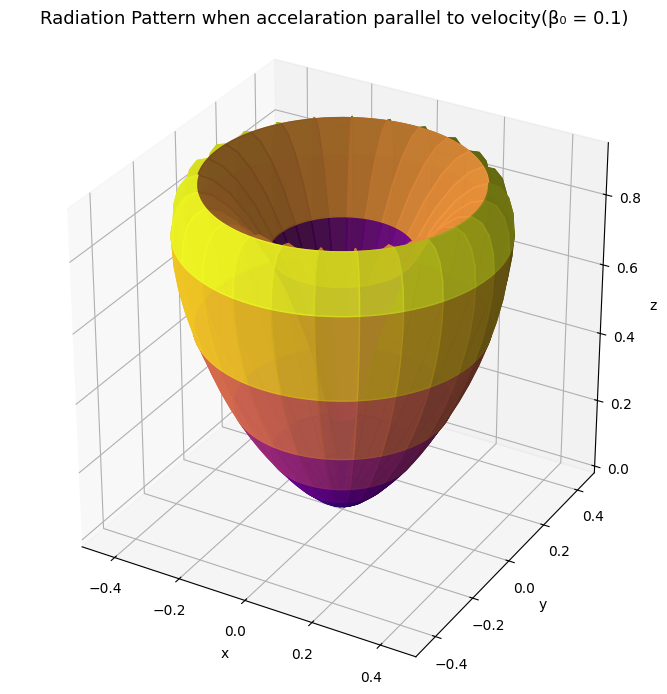

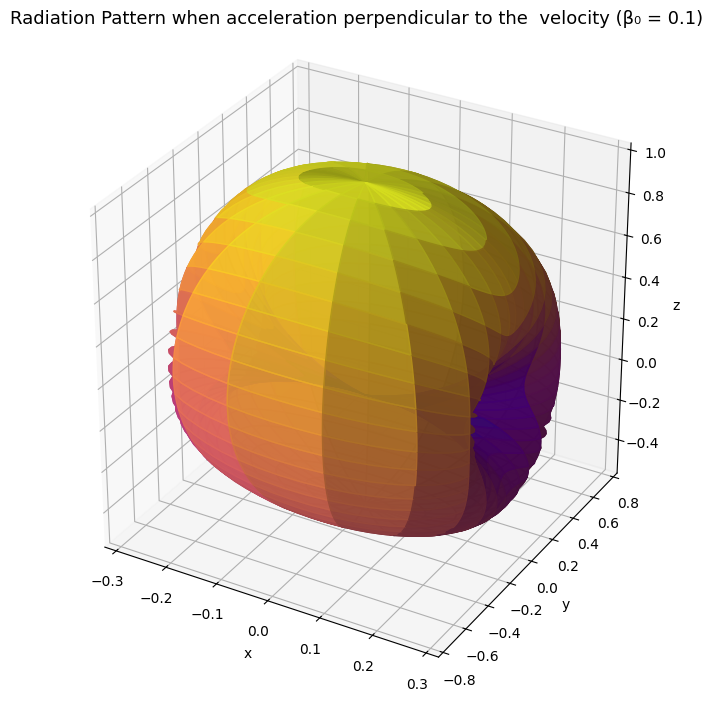

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def radiation_pattern_parallel(a_parallel,beta0,t,q=1.0,c=1.0,points=100):#when accelaration is parallel to velocity
    theta = np.linspace(0, np.pi, points)
    phi = np.linspace(0, 2 * np.pi, points)
    theta, phi = np.meshgrid(theta, phi)

    term=(a_parallel* t/c)+(beta0/np.sqrt(1-beta0**2))
    beta_parallel=term/np.sqrt(1+term**2)

    dpdomega=(q**2*a_parallel**2*np.sin(theta)**2) / (
        4*np.pi*c**3*(1-beta_parallel*np.cos(theta))**6
    )

    # Normalize for visualization
    r=dpdomega/np.max(dpdomega)

    # Convert to Cartesian
    x=r*np.sin(theta)*np.cos(phi)
    y=r*np.sin(theta)*np.sin(phi)
    z=r*np.cos(theta)

    # Plot single 3D pattern
    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(
        x, y, z,
        facecolors=plt.cm.plasma(r),
        rstride=4, cstride=4,
        alpha=0.9
    )

    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(f"Radiation Pattern when accelaration parallel to velocity(β₀ = {beta0})", fontsize=13)
    plt.tight_layout()
    plt.show()



def radiation_pattern_perpendicular(a_perp,beta0,t,q=1.0,c=1.0,points=100):
    theta=np.linspace(0,np.pi,points)
    phi=np.linspace(0,2*np.pi,points)
    theta,phi=np.meshgrid(theta,phi)

    k0=beta0**2/(1-beta0**2)
    beta_perp=np.sqrt((k0+(a_perp**2*t**2)/c**2)/(1+k0+(a_perp**2*t**2)/c**2))
    gamma=1/np.sqrt(1-beta_perp**2)

    term=1-beta_perp*np.cos(theta)
    term2=1-((np.sin(theta)*np.cos(phi))/(gamma*(1-beta_perp*np.cos(theta))))**2

    dpdomega_perp=q**2*a_perp**2*term2/(term*4*np.pi*c**3)

    r=dpdomega_perp/np.max(dpdomega_perp)

    x=r*np.sin(theta)*np.cos(phi)
    y=r*np.sin(theta)*np.sin(phi)
    z=r*np.cos(theta)

    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(
        x, y, z,
        facecolors=plt.cm.plasma(r),
        rstride=4, cstride=4,
        alpha=0.9
    )

    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(f"Radiation Pattern when acceleration perpendicular to the  velocity (β₀ = {beta0})", fontsize=13)
    plt.tight_layout()
    plt.show()



a_parallel=0.9
beta0=0.1
t=1
a_perp=0.3
radiation_pattern_parallel(a_parallel,beta0,t)
radiation_pattern_perpendicular(a_perp,beta0,t)


# Angular distribution 2d polar plot when accelaration parallel to velocity

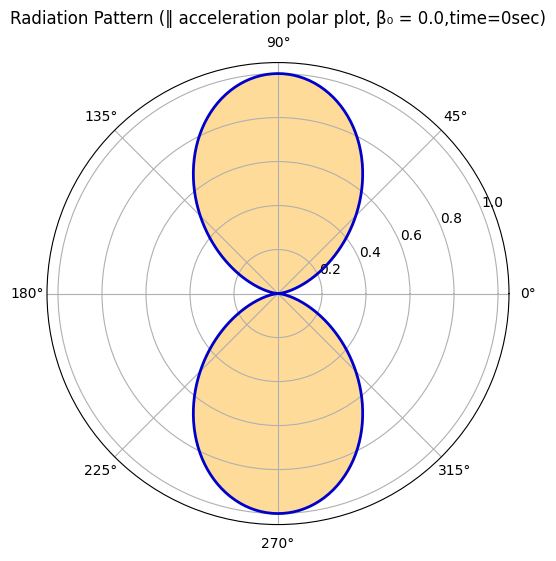

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def radiation_pattern_parallel_2d(a_parallel, beta0, t, q=1.0, c=1.0, points=500):
    
    theta = np.linspace(0,2*np.pi,points)
    phi = 0  # fixed

    # Relativistic parallel velocity evolution
    term=(a_parallel*t/c)+(beta0/np.sqrt(1-beta0**2))
    beta_parallel=term/np.sqrt(1+term**2)

    # Radiation intensity (parallel acceleration case)
    dpdomega=(q**2*a_parallel**2*np.sin(theta)**2) / (
        4*np.pi*c**3*(1-beta_parallel*np.cos(theta))**6
    )

    # Normalize for visualization
    r=dpdomega/np.max(dpdomega)

    # Polar plot for φ = 0 plane
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    ax.plot(theta, r, color='mediumblue', lw=2)
    ax.fill_between(theta, 0, r, color='orange', alpha=0.4)
    ax.set_title(f"Radiation Pattern (‖ acceleration polar plot, β₀ = {beta0},time={t}sec)", va='bottom')
    plt.show()

# Example usage:
radiation_pattern_parallel_2d(a_parallel=0.9,beta0=0.0,t=0)

#  Angular Distribution when accelaration perpendicular to velocity 2d polar plot 

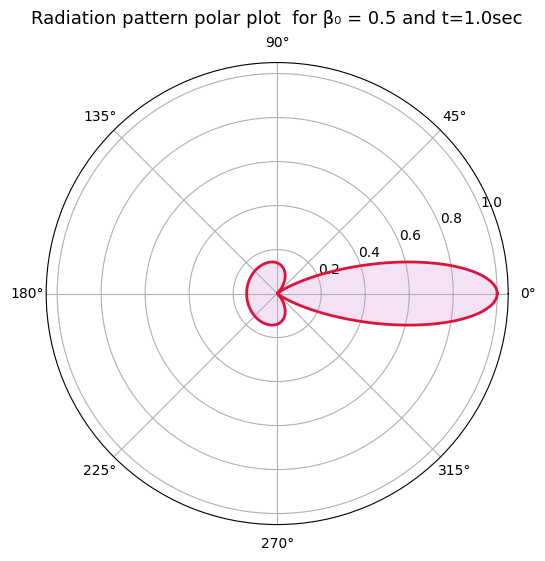

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def radiation_pattern_perpendicular_2d(a_perp, beta0, t, q=1.0, c=1.0, points=1000):
    
    theta = np.linspace(0, 2*np.pi, points)
    phi = 0  # cross-section plane

    # Relativistic quantities
    k0 = beta0**2/(1-beta0**2)
    beta_perp=np.sqrt((k0+(a_perp**2*t**2)/c**2)/(1+k0+(a_perp**2*t**2)/c**2))
    gamma=1/np.sqrt(1-beta_perp**2)

    # Radiation intensity formula
    term=1-beta_perp*np.cos(theta)
    term2=1-((np.sin(theta)*np.cos(phi))/(gamma*(1-beta_perp*np.cos(theta))))**2
    dpdomega=q**2*a_perp**2*term2/(term*4*np.pi*c**3)

    # Normalize for shape
    r = dpdomega/np.max(dpdomega)

    # --- Plot in polar coordinates ---
    plt.figure(figsize=(7,6))
    ax = plt.subplot(111, polar=True)
    ax.plot(theta,r,color='crimson',lw=2)
    ax.fill(theta,r,color='plum',alpha=0.3)

    ax.set_title(f"Radiation pattern polar plot  for β₀ = {beta0} and t={t}sec", va='bottom', fontsize=13)
    plt.show()

# Example usage
radiation_pattern_perpendicular_2d(a_perp=1,beta0=0.5,t=1.0)


# Question 5 radiation Reaction force vs time 

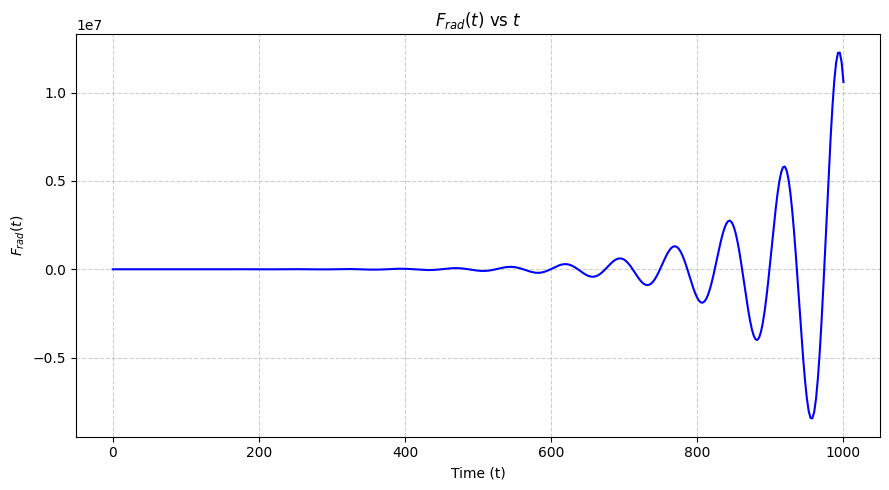

In [6]:
#question 5
import numpy as np
import matplotlib.pyplot as plt

# Constants
e = 1
v0 = 1
c = 1

# Define the function
def Frad(t):
    return (2*e**2*v0)/(3*c**3)*(
        ((-900+10**(-4))*np.sin(30*t)*np.exp(t / 100))
        + (60*np.cos(30*t)*np.exp(t/100)/100)
    )

# Time range 
t=np.linspace(0,1000,400)  

# Evaluate the function
F_values=Frad(t)

# Plot
plt.figure(figsize=(9,5))
plt.plot(t,F_values,color='blue',lw=1.5)
plt.title(r"$F_{rad}(t)$ vs $t$")
plt.xlabel("Time (t)")
plt.ylabel(r"$F_{rad}(t)$")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Question 6 Thermal bremsstrahlung 

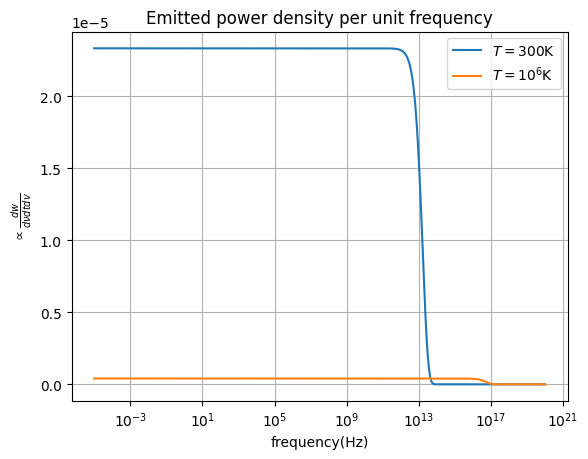

In [7]:
#quention no 6
import numpy as np
import matplotlib.pyplot as plt

h=6.626*10**(-34)
k=1.38*10**(-23)
m=9.31*10**(-31)
def work_freq(freq,temp):
  a=h*freq/(k*temp)
  b=(2*k*temp)/m
  return np.exp(-a)*(0.6*a**2+2.2*a+2.2)/np.sqrt(b)
freqs=np.logspace(-5,20,1000)
plt.plot(freqs,work_freq(freqs,300),label=r'$T=300$K')
plt.plot(freqs,work_freq(freqs,10**6),label=r'$T=10^6$K')
plt.semilogx()
plt.grid()
plt.legend()
plt.title('Emitted power density per unit frequency')
plt.xlabel('frequency(Hz)')
plt.ylabel(r'$\propto \frac{dw}{d\nu dt dv}$')
plt.show()